# 0. Prerequisite

In [ ]:
# https://research.google.com/colaboratory/local-runtimes.html

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

# Step 12. Sequential Model

## p87. Simple Linear Regression

### 1~3 line - import

import statement

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 14~22 line - dataset

In [2]:
def dataset(a=3.0, b=-10.0, x_min=.0, x_max=10.0, train_size=100): # tensorflow    
  tf.random.set_seed(1)
  x = tf.linspace(x_min, x_max, train_size)
  y_label = a * x + b     # y = 3x - 10
  y = y_label + tf.random.normal([train_size], mean=0.0, stddev = 2.0)
  return x, y, y_label

x, y, y_label = dataset()

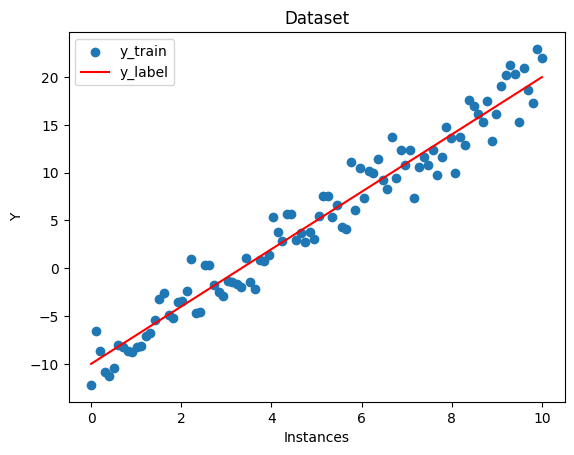

In [3]:
x, y, y_label = dataset()
fig, ax = plt.subplots()
ax.scatter(x, y, label='y_train')
ax.plot(x, y_label, color='red', label='y_label')
ax.set_xlabel('Instances')
ax.set_ylabel('Y')
ax.set_title('Dataset')
ax.legend()
plt.show()

### 24~28 line - model

Sequence class

<img src="https://dq-blog.s3.amazonaws.com/tutorial-introduction-to-keras/1.1-m767-1.svg"/>


In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
model = tf.keras.Sequential([])
model.add(tf.keras.layers.Dense(units=1, input_dim=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________



<img src="https://149695847.v2.pressablecdn.com/wp-content/uploads/2021/09/image-123.png" width="400"/>




In [ ]:
# inputs = tf.keras.Input(shape=(1,))
# outputs = tf.keras.layers.Dense(1)(inputs)
# model = tf.keras.Model(inputs=inputs, outputs=outputs, name="simple_linear_regression")
# model.summary()

In [ ]:
!pip install pydot
!pip install graphviz
!pip install tensorboard
!pip install tensorrt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.2/819.2 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.6/719.6 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 13.5 MB/s eta 0:00:00


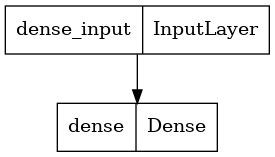

In [ ]:
tf.keras.utils.plot_model(model)

### Tensorboard - visualizations

In [ ]:
import datetime
%load_ext tensorboard
!rm -rf ./logs/
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_images=True)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


### 32~33 line - configure

* p49 - mse (mean squared error)
* p69 - tf.keras.optimizers

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='mse') # 'mean_squared_error'

### 37~38 line - train

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit
# 0: silent, 1:progress bar,  2: one line per epoch 
# return a record of training loss values and metrics values
record = model.fit(x, y, epochs=100, batch_size=4, verbose=2, callbacks=[tensorboard_callback])
#record = model.fit(x, y, epochs=100, batch_size=1, verbose=2)
print("len(model.layers):", len(model.layers)) # 1

Epoch 1/100


2023-04-22 18:52:44.078906: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f674d77c9a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-04-22 18:52:44.078921: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2023-04-22 18:52:44.081547: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


25/25 - 2s - loss: 36.2351 - 2s/epoch - 67ms/step
Epoch 2/100
25/25 - 0s - loss: 32.9072 - 21ms/epoch - 834us/step
Epoch 3/100


2023-04-22 18:52:44.960384: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8900
2023-04-22 18:52:44.999082: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-04-22 18:52:45.035584: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


25/25 - 0s - loss: 30.6268 - 18ms/epoch - 717us/step
Epoch 4/100
25/25 - 0s - loss: 29.2112 - 16ms/epoch - 654us/step
Epoch 5/100
25/25 - 0s - loss: 28.2367 - 17ms/epoch - 697us/step
Epoch 6/100
25/25 - 0s - loss: 27.1952 - 18ms/epoch - 740us/step
Epoch 7/100
25/25 - 0s - loss: 26.2995 - 17ms/epoch - 698us/step
Epoch 8/100
25/25 - 0s - loss: 25.4197 - 19ms/epoch - 754us/step
Epoch 9/100
25/25 - 0s - loss: 24.6887 - 16ms/epoch - 650us/step
Epoch 10/100
25/25 - 0s - loss: 23.9078 - 18ms/epoch - 707us/step
Epoch 11/100
25/25 - 0s - loss: 23.0653 - 19ms/epoch - 756us/step
Epoch 12/100
25/25 - 0s - loss: 22.4076 - 17ms/epoch - 697us/step
Epoch 13/100
25/25 - 0s - loss: 21.6410 - 19ms/epoch - 752us/step
Epoch 14/100
25/25 - 0s - loss: 20.9339 - 18ms/epoch - 730us/step
Epoch 15/100
25/25 - 0s - loss: 20.2788 - 18ms/epoch - 722us/step
Epoch 16/100
25/25 - 0s - loss: 19.6288 - 18ms/epoch - 722us/step
Epoch 17/100
25/25 - 0s - loss: 19.0358 - 18ms/epoch - 700us/step
Epoch 18/100
25/25 - 0s - los

### 40~44 line - loss

In [ ]:
loss = record.history['loss']
print("loss:", loss[-1])
print("weights:", model.layers[0].weights[0].numpy())
print("bias:", model.layers[0].weights[1].numpy()) # model.layers[0].bias.numpy()

loss: 3.7674338817596436
weights: [[2.9411757]]
bias: [-9.590173]


### 45~53 line - plot

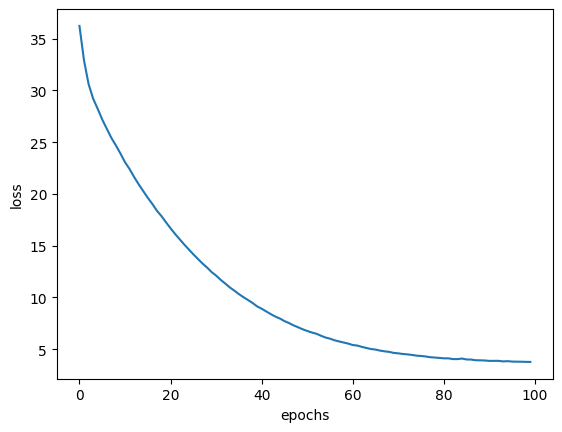

4/4 [==============================] - 0s 688us/step


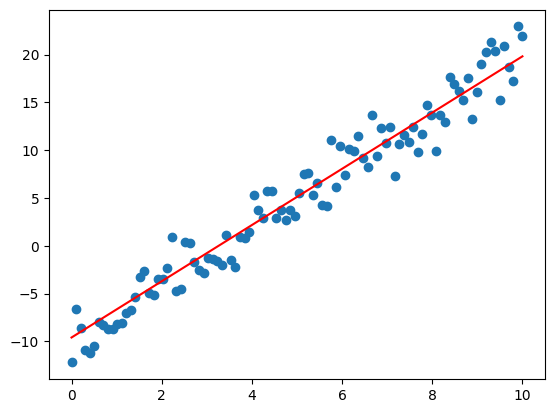

In [ ]:
plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

plt.scatter(x, y)
y_pred = model.predict(x)
plt.plot(x, y_pred, color='red')
plt.show()

4/4 [==============================] - 0s 688us/step


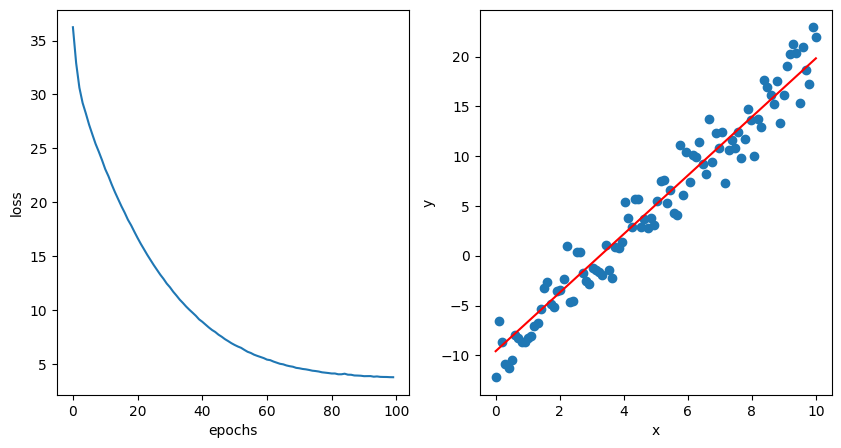

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10, 5))
axs[0].plot(loss)
axs[0].set_xlabel('epochs')
axs[0].set_ylabel('loss')

axs[1].scatter(x, y)
y_pred = model.predict(x)
axs[1].plot(x, y_pred, color='red')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
plt.show()

In [ ]:
#%tensorboard --logdir logs/fit

### (Jupyter only) Authorize TensorBoard.dev
This step is not necessary in Colab

This step requires you to auth in your shell console, outside of Jupyter. In your console, execute the following command.

tensorboard dev list

As part of this flow, you will be provided with an authorization code. This code is required to consent to the Terms of Service.

### Upload to TensorBoard.dev

Uploading the TensorBoard logs will give you a URL that can be shared with anyone.

Uploaded TensorBoards are public, so do not upload sensitive data.

The uploader will exit when the entire logdir has uploaded.  (This is what the `--one_shot` flag specifies.)

In [ ]:
!tensorboard dev upload --logdir logs --name "Our First Deep Learning Model" --description "the simplest linear regression" --one_shot

2023-04-22 18:54:35.230249: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/ZEKHvZs0QQuwMGfKQmrFQw/

[2023-04-22T18:54:36] Started scanning logdir.
[2023-04-22T18:54:37] Total uploaded: 10 scalars, 20 tensors (14.4 kB), 0 binary objects
[2023-04-22T18:54:37] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/ZEKHvZs0QQuwMGfKQmrFQw/


## p.89 Linear Regression with two variables 

### 1~3 line - import

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 5~17 line - dataset

In [ ]:
def dataset(): 
  train_data = np.array([ 
                        # x0, x1, t      
                        [ 1,  1,  6],
                        [ 2,  1,  7],
                        [ 3,  2,  10],
                        [ 4,  2,  11],
                        [ 5,  3,  14],
                        [ 6,  3,  12],
                        [ 7,  4,  18],
                        [ 8,  4,  19]], dtype=np.float32)
  return train_data[:, :-1], train_data[:, -1:]

X, y = dataset()

In [ ]:
def dataset(train_size=100): 
  tf.random.set_seed(1)
  x0 = tf.linspace(0.0, 10.0, num=train_size)
  x1 = tf.linspace(-2., 2., num=train_size)
  y_label = 1*x0 + 2*x1 + 3   # y = 1*x0 + 2*x1 + 3
  y = y_label + tf.random.normal([train_size], mean=0.0, stddev = 2.0)
  X = tf.concat([tf.reshape(x0, [-1,1]), tf.reshape(x1, [-1, 1])], 1)
  return X, y, y_label
  

X, y, y_label = dataset()

### 20~22 line - model

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=2)) # input_shape=(2,)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


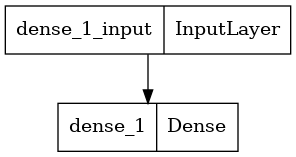

In [ ]:
tf.keras.utils.plot_model(model)

### 26~27 line - configure

In [ ]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse') # 'mean_squared_error'

### 30~31 line - train

In [ ]:
X.shape

(8, 2)

In [ ]:
# 0: silent, 1:progress bar,  2: one line per epoch 
history = model.fit(X, y, epochs=10, batch_size=4, verbose=2, callbacks=[tensorboard_callback])

Epoch 1/10
25/25 - 0s - loss: 61.8066 - 331ms/epoch - 13ms/step
Epoch 2/10
25/25 - 0s - loss: 4.2421 - 20ms/epoch - 789us/step
Epoch 3/10
25/25 - 0s - loss: 3.7961 - 21ms/epoch - 840us/step
Epoch 4/10
25/25 - 0s - loss: 4.2185 - 21ms/epoch - 832us/step
Epoch 5/10
25/25 - 0s - loss: 4.2527 - 19ms/epoch - 745us/step
Epoch 6/10
25/25 - 0s - loss: 4.1596 - 18ms/epoch - 705us/step
Epoch 7/10
25/25 - 0s - loss: 4.3853 - 20ms/epoch - 816us/step
Epoch 8/10
25/25 - 0s - loss: 4.1762 - 20ms/epoch - 801us/step
Epoch 9/10
25/25 - 0s - loss: 4.1780 - 22ms/epoch - 863us/step
Epoch 10/10
25/25 - 0s - loss: 4.0320 - 19ms/epoch - 761us/step


32~34 line

In [ ]:
# y_pred = model.predict(X)
# print("y_pred:", y_pred)
# print("len(model.layers):", len(model.layers)) # 1

### 36~40 line - loss

In [ ]:
loss = history.history['loss']
print("loss:", loss[-1])
#print(model.get_weights())
print("weights:", model.layers[0].weights[0].numpy())
print("bias:", model.layers[0].weights[1].numpy()) # model.layers[0].bias.numpy()

loss: 2.2907209396362305
weights: [[1.5759236]
 [1.2789092]]
bias: [1.2937276]


### 42-45 line - plot

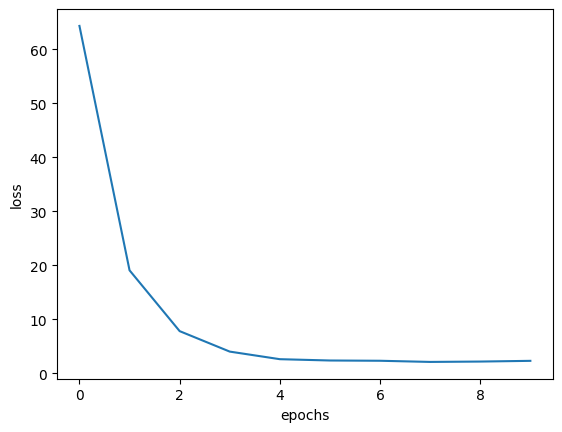

In [ ]:
plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [ ]:
# t = 1*x0 + 2*x1 + 3
def dataset2():
  x0 = np.linspace(1, 10, 20)
  x1 = np.linspace(-2, 2, 20)
  y = 1* x0 + 2*x1 + 3
  return x0, x1, y

def dataset3(train_size=100): 
  tf.random.set_seed(1)
  x0 = tf.linspace(0.0, 10.0, num=train_size)
  x1 = tf.linspace(-2.0, 2.0, num=train_size)
  y_label = 1*x0 + 2*x1 + 3   # y = 1*x0 + 2*x1 + 3
  y = y_label + tf.random.normal([train_size], mean=0.0, stddev = 2.0)
  X = tf.concat([tf.reshape(x0, [-1,1]), tf.reshape(x1, [-1,1])], 1)
  return X, y, y_label

X, y, y_label = dataset3()

In [ ]:
def make_model():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(units=1, input_dim=2)) # input_shape=(2,)
  model.summary()
  return model

model = make_model()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def configure(model):
  opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
  model.compile(optimizer=opt, loss='mse') # 'mean_squared_error'
  return model

config_model = configure(model)

In [ ]:
def train(model, X, y):
  # 0: silent, 1:progress bar,  2: one line per epoch 
  history = model.fit(X, y, epochs=100, batch_size=4, verbose=2)
  return history

history = train(model, X, y)

Epoch 1/100
25/25 - 0s - loss: 6.2091 - 169ms/epoch - 7ms/step
Epoch 2/100
25/25 - 0s - loss: 3.9878 - 8ms/epoch - 327us/step
Epoch 3/100
25/25 - 0s - loss: 3.8775 - 12ms/epoch - 499us/step
Epoch 4/100
25/25 - 0s - loss: 4.2315 - 20ms/epoch - 814us/step
Epoch 5/100
25/25 - 0s - loss: 4.2526 - 17ms/epoch - 681us/step
Epoch 6/100
25/25 - 0s - loss: 4.1596 - 17ms/epoch - 676us/step
Epoch 7/100
25/25 - 0s - loss: 4.3853 - 27ms/epoch - 1ms/step
Epoch 8/100
25/25 - 0s - loss: 4.1762 - 19ms/epoch - 758us/step
Epoch 9/100
25/25 - 0s - loss: 4.1780 - 17ms/epoch - 665us/step
Epoch 10/100
25/25 - 0s - loss: 4.0320 - 15ms/epoch - 588us/step
Epoch 11/100
25/25 - 0s - loss: 4.1454 - 16ms/epoch - 623us/step
Epoch 12/100
25/25 - 0s - loss: 4.2266 - 15ms/epoch - 583us/step
Epoch 13/100
25/25 - 0s - loss: 3.9880 - 16ms/epoch - 627us/step
Epoch 14/100
25/25 - 0s - loss: 4.4483 - 15ms/epoch - 617us/step
Epoch 15/100
25/25 - 0s - loss: 4.1370 - 17ms/epoch - 678us/step
Epoch 16/100
25/25 - 0s - loss: 4.2809

In [ ]:
def print_train_result(model, history):
  loss = history.history['loss']
  print("loss:", loss[-1])
  #print(model.get_weights())
  print("weights:", model.layers[0].weights[0].numpy())
  print("bias:", model.layers[0].weights[1].numpy()) # model.layers[0].bias.numpy()

print_train_result(model, history)

loss: 4.3264689445495605
weights: [[1.6403288]
 [0.8261257]]
bias: [-0.3013755]


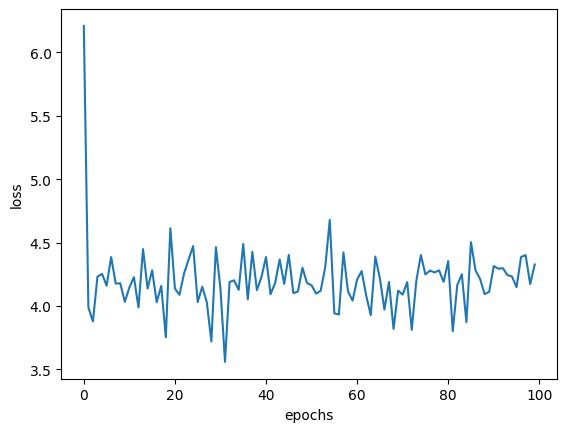

In [ ]:
def plot_result(data, ylabel, xlabel='epochs'):
  plt.plot(data)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

plot_result(history.history['loss'], 'loss')

4/4 [==============================] - 0s 5ms/step


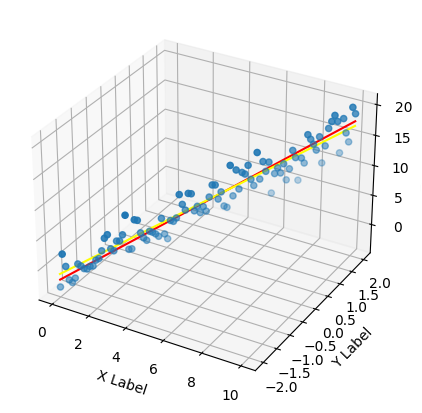

In [ ]:
def plot_predict(model, X, y, y_label):
  fig = plt.figure(figsize=(10, 5))
  ax = fig.add_subplot(projection='3d')
  #ax.scatter(X[:, 0], X[:, 1], y_true)
  #ax.plot(tf.reshape(X[:, 0], [-1]), tf.reshape(X[:, 1], [-1]), tf.reshape(y_true, [-1]))
  ax.scatter(X[:, 0], X[:, 1], y)
  y_pred = model.predict(X)
  ax.plot(X[:, 0], X[:, 1], tf.reshape(y_pred,[-1]), color='red')
  ax.plot(X[:, 0], X[:, 1], y_label, color='yellow')
  ax.set_xlabel('X Label')
  ax.set_ylabel('Y Label')
  ax.set_zlabel('Z Label')

  plt.show()

plot_predict(model, X, y, y_label)

## p.91 Polynomial Regression

### 1~3 line - import

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 5~12 line - dataset

In [ ]:
def dataset(train_size=50): # tensorflow    
     tf.random.set_seed(1)
     x = tf.linspace(-5.0, 5.0, num=train_size)
     y_label = 3.0*x**3 + 2.0*x**2 + x + 4.0
     y = y_label + tf.random.normal([train_size], mean=0.0, stddev = 30.0)
     return x, y, y_label

x, y, y_label = dataset()

In [ ]:
x

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-5.        , -4.7959185 , -4.591837  , -4.387755  , -4.1836734 ,
       -3.9795918 , -3.7755103 , -3.5714285 , -3.3673468 , -3.1632652 ,
       -2.9591837 , -2.755102  , -2.5510204 , -2.3469386 , -2.142857  ,
       -1.9387753 , -1.7346938 , -1.5306122 , -1.3265305 , -1.1224489 ,
       -0.9183674 , -0.7142854 , -0.51020384, -0.3061223 , -0.10204077,
        0.10204077,  0.30612278,  0.5102043 ,  0.71428585,  0.9183674 ,
        1.1224494 ,  1.3265309 ,  1.5306125 ,  1.734694  ,  1.9387755 ,
        2.1428576 ,  2.346939  ,  2.5510206 ,  2.7551022 ,  2.9591842 ,
        3.1632652 ,  3.3673468 ,  3.5714293 ,  3.7755108 ,  3.9795923 ,
        4.183674  ,  4.3877554 ,  4.591837  ,  4.7959185 ,  5.        ],
      dtype=float32)>

16 ~24 line

In [ ]:
# n-차 다항식 회귀
n = 3
X = np.ones(shape = (len(x), n+1), dtype=np.float32)
##X[:, 0] = 1.0
##X[:, 1] = x
##X[:, 2] = x**2
##X[:, 3] = x**3
for i in range(1, n+1):
     X[:, i] = x**i

In [ ]:
X.shape

(50, 4)

### 26~28 line - model

In [ ]:
model=tf.keras.Sequential(
        [tf.keras.layers.Dense(units=1, use_bias=False, input_dim=4)])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


### 30~31 line - configure

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='mse')

### 32~33 line - train

In [ ]:
ret = model.fit(X, y, epochs=400, verbose=2)
print("len(model.layers):", len(model.layers)) # 1

Epoch 1/400
2/2 - 0s - loss: 30968.9902 - 167ms/epoch - 84ms/step
Epoch 2/400
2/2 - 0s - loss: 30560.3145 - 2ms/epoch - 1ms/step
Epoch 3/400
2/2 - 0s - loss: 30219.5195 - 2ms/epoch - 998us/step
Epoch 4/400
2/2 - 0s - loss: 29881.7324 - 3ms/epoch - 1ms/step
Epoch 5/400
2/2 - 0s - loss: 29504.7441 - 2ms/epoch - 770us/step
Epoch 6/400
2/2 - 0s - loss: 29180.4297 - 0s/epoch - 0s/step
Epoch 7/400
2/2 - 0s - loss: 28803.3457 - 0s/epoch - 0s/step
Epoch 8/400
2/2 - 0s - loss: 28466.9746 - 11ms/epoch - 6ms/step
Epoch 9/400
2/2 - 0s - loss: 28124.6094 - 2ms/epoch - 998us/step
Epoch 10/400
2/2 - 0s - loss: 27781.1953 - 2ms/epoch - 997us/step
Epoch 11/400
2/2 - 0s - loss: 27407.4043 - 2ms/epoch - 997us/step
Epoch 12/400
2/2 - 0s - loss: 27132.2656 - 2ms/epoch - 997us/step
Epoch 13/400
2/2 - 0s - loss: 26757.5898 - 2ms/epoch - 997us/step
Epoch 14/400
2/2 - 0s - loss: 26446.6348 - 3ms/epoch - 1ms/step
Epoch 15/400
2/2 - 0s - loss: 26135.3398 - 2ms/epoch - 998us/step
Epoch 16/400
2/2 - 0s - loss: 257

### 35~38 line - loss

In [ ]:
loss = ret.history['loss']
print("loss:", loss[-1])
#print(model.get_weights())  # weights
print("weights:", model.layers[0].weights[0].numpy())

loss: 654.2473754882812
weights: [[2.7454333]
 [3.7364168]
 [1.7173611]
 [2.8545804]]


### 40~48 line - plot

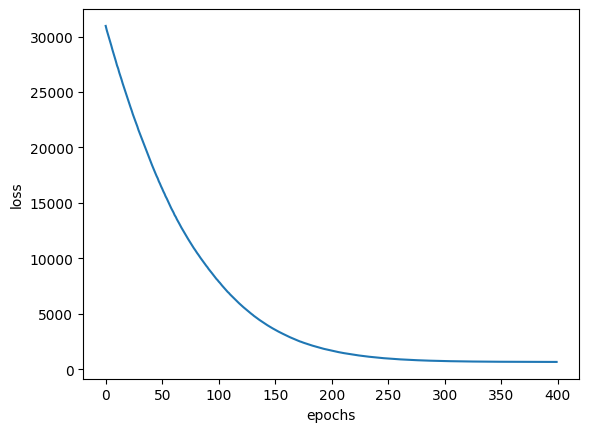

2/2 [==============================] - 0s 8ms/step


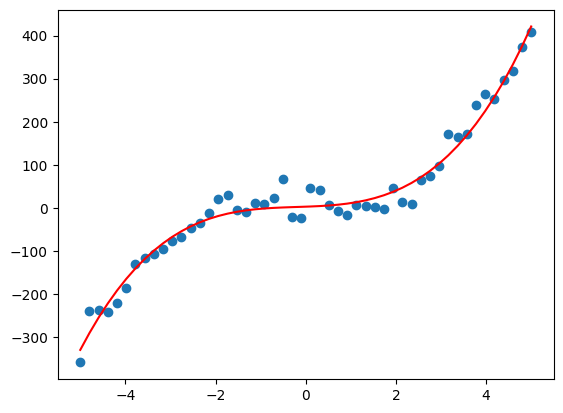

In [ ]:
plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

plt.scatter(x, y) 
y_pred = model.predict(X)
plt.plot(x, y_pred, color='red')
plt.show()

## Note - Benchmark

In [ ]:
def dataset(train_size=100): # tensorflow    
     tf.random.set_seed(1)
     x = tf.linspace(-5.0, 5.0, num=train_size)
     y_label = 3.0*x**3 + 2.0*x**2 + x + 4.0
     y = y_label + tf.random.normal([train_size], mean=0.0, stddev = 10.0)
     return x, y, y_label

x, y, y_label = dataset(200)

In [ ]:
def min_max_scaler(data):
  x_min, x_max = tf.reduce_min(data), tf.reduce_max(data)
  x_std = (data-x_min)/(x_max-x_min)
  #print(x_std)
  return x_std, x_min, x_max

In [ ]:
def standard_scaler(data):
  # z = (x - u) / s
  x_mean = tf.reduce_mean(x)
  x_std = tf.math.reduce_std(x)
  x_scaled = (data - x_mean) / x_std
  return x_scaled, x_mean, x_std

In [ ]:
def transform_data(x, y, y_label, scaler):
  x_scaled, x_mean, x_std = standard_scaler(x)
  y_scaled, y_mean, y_std = standard_scaler(y)
  y_label_scaled, y_label_mean, y_label_std = standard_scaler(y_label)
  x_scaled = tf.reshape(x_scaled, [-1, 1])
  X = tf.concat([x_scaled, x_scaled**2, x_scaled**3], 1)
  return X, y_scaled, y_label_scaled, x_mean, x_std, y_mean, y_std, y_label_mean, y_label_std

X, y_scaled, y_label_scaled, x_mean, x_std, y_mean, y_std, y_label_mean, y_label_std = transform_data(x, y, y_label, standard_scaler)

In [ ]:
def make_hyper_params():
  params = {
      'opt': ['Adam', 'RMSprop','SGD'],
      'lr': [0.1, 0.05, 0.01, 0.005, 0.001],
      'loss_fn': ['MAE', 'MSE'],
      'batch': [1, 2, 4, 8, 16],
  }
  import itertools
  permutations_dicts = [dict(zip(params.keys(), v))  for v in itertools.product(*params.values())]
  permutations_dicts
  return permutations_dicts

params = make_hyper_params()
params

[{'opt': 'Adam', 'lr': 0.1, 'loss_fn': 'MAE', 'batch': 1},
 {'opt': 'Adam', 'lr': 0.1, 'loss_fn': 'MAE', 'batch': 2},
 {'opt': 'Adam', 'lr': 0.1, 'loss_fn': 'MAE', 'batch': 4},
 {'opt': 'Adam', 'lr': 0.1, 'loss_fn': 'MAE', 'batch': 8},
 {'opt': 'Adam', 'lr': 0.1, 'loss_fn': 'MAE', 'batch': 16},
 {'opt': 'Adam', 'lr': 0.1, 'loss_fn': 'MSE', 'batch': 1},
 {'opt': 'Adam', 'lr': 0.1, 'loss_fn': 'MSE', 'batch': 2},
 {'opt': 'Adam', 'lr': 0.1, 'loss_fn': 'MSE', 'batch': 4},
 {'opt': 'Adam', 'lr': 0.1, 'loss_fn': 'MSE', 'batch': 8},
 {'opt': 'Adam', 'lr': 0.1, 'loss_fn': 'MSE', 'batch': 16},
 {'opt': 'Adam', 'lr': 0.05, 'loss_fn': 'MAE', 'batch': 1},
 {'opt': 'Adam', 'lr': 0.05, 'loss_fn': 'MAE', 'batch': 2},
 {'opt': 'Adam', 'lr': 0.05, 'loss_fn': 'MAE', 'batch': 4},
 {'opt': 'Adam', 'lr': 0.05, 'loss_fn': 'MAE', 'batch': 8},
 {'opt': 'Adam', 'lr': 0.05, 'loss_fn': 'MAE', 'batch': 16},
 {'opt': 'Adam', 'lr': 0.05, 'loss_fn': 'MSE', 'batch': 1},
 {'opt': 'Adam', 'lr': 0.05, 'loss_fn': 'MSE', 

********************
opt: Adam, lr: 0.1, loss_fn: MAE, batch: 1
min_loss: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.00, loss: 2.93
loss: 2.93, weights: [[ 1.6788244]
 [ 5.247576 ]
 [24.444729 ]], bias: [1.7606677]


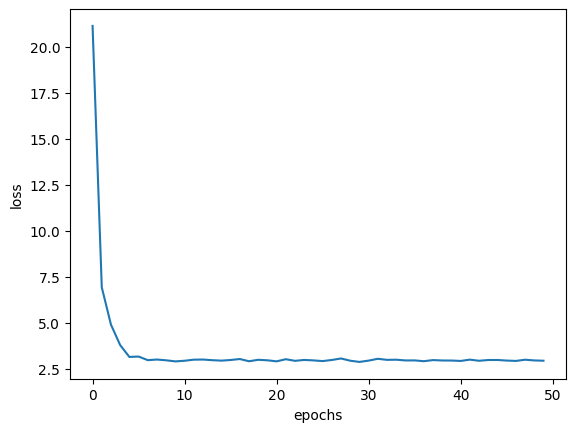

7/7 [==============================] - 0s 1ms/step


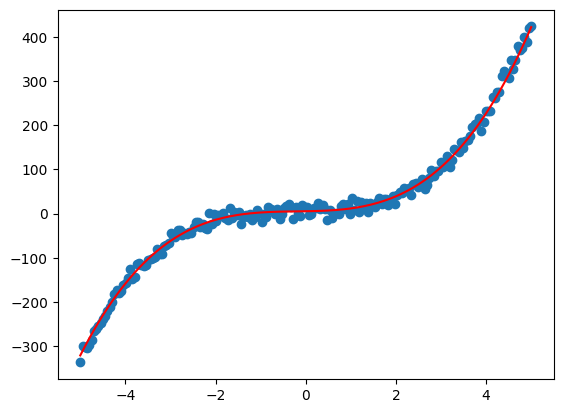

********************
opt: Adam, lr: 0.1, loss_fn: MAE, batch: 2
min_loss: 2.93, loss: 2.88
loss: 2.88, weights: [[ 1.6714776]
 [ 5.307697 ]
 [24.551924 ]], bias: [2.193889]


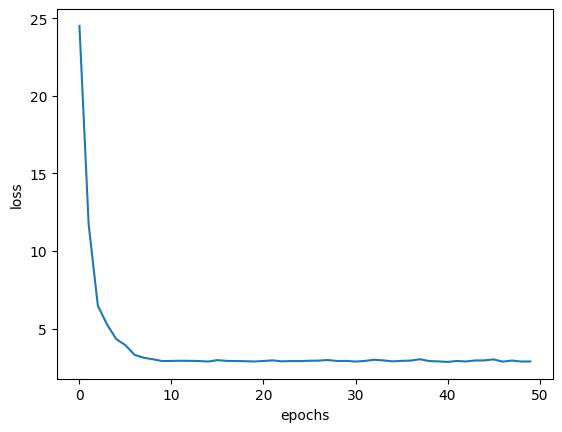

7/7 [==============================] - 0s 997us/step


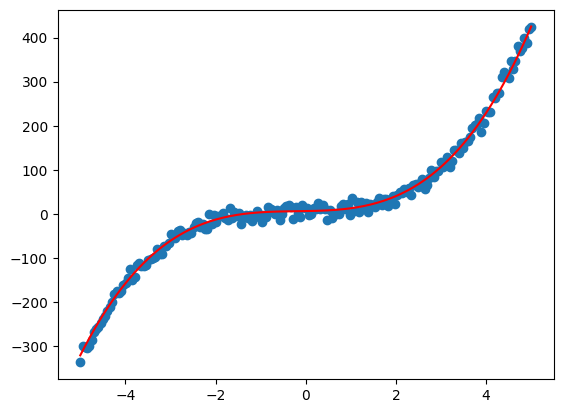

********************
opt: Adam, lr: 0.1, loss_fn: MAE, batch: 4
min_loss: 2.88, loss: 2.88
********************
opt: Adam, lr: 0.1, loss_fn: MAE, batch: 8
min_loss: 2.88, loss: 2.84
loss: 2.84, weights: [[ 2.171705]
 [ 5.059255]
 [24.828007]], bias: [2.4118042]


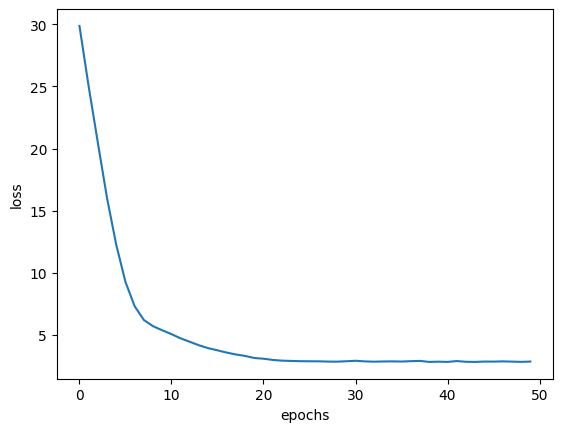

7/7 [==============================] - 0s 669us/step


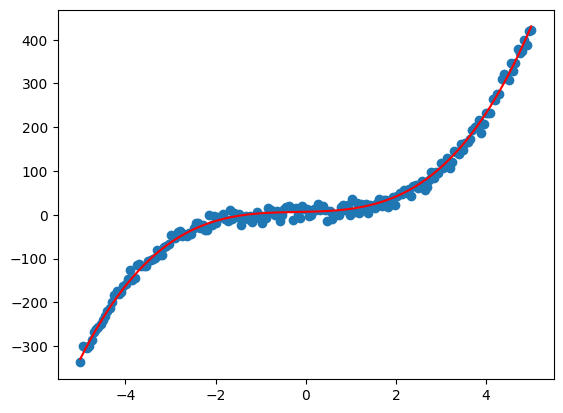

********************
opt: Adam, lr: 0.1, loss_fn: MAE, batch: 16
min_loss: 2.84, loss: 2.83
loss: 2.83, weights: [[ 2.99783  ]
 [ 5.0039454]
 [24.258114 ]], bias: [2.0263984]


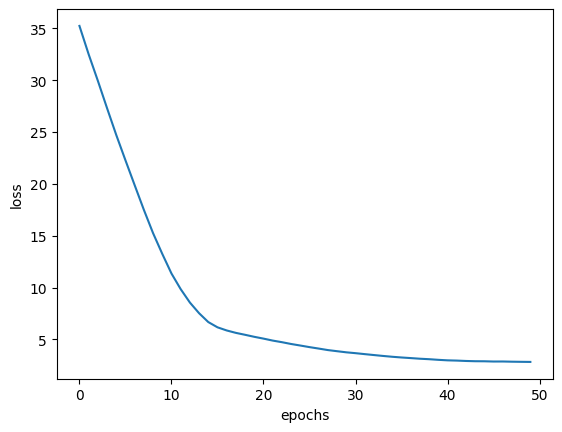

7/7 [==============================] - 0s 701us/step


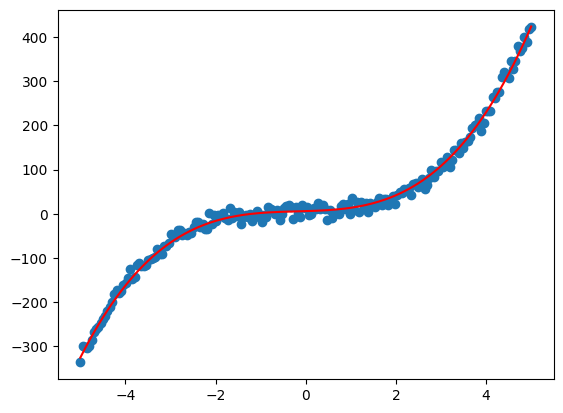

********************
opt: Adam, lr: 0.1, loss_fn: MSE, batch: 1
min_loss: 2.83, loss: 12.48
********************
opt: Adam, lr: 0.1, loss_fn: MSE, batch: 2
min_loss: 2.83, loss: 12.41
********************
opt: Adam, lr: 0.1, loss_fn: MSE, batch: 4
min_loss: 2.83, loss: 12.65
********************
opt: Adam, lr: 0.1, loss_fn: MSE, batch: 8
min_loss: 2.83, loss: 20.90
********************
opt: Adam, lr: 0.1, loss_fn: MSE, batch: 16
min_loss: 2.83, loss: 41.27
********************
opt: Adam, lr: 0.05, loss_fn: MAE, batch: 1
min_loss: 2.83, loss: 2.87
********************
opt: Adam, lr: 0.05, loss_fn: MAE, batch: 2
min_loss: 2.83, loss: 2.86
********************
opt: Adam, lr: 0.05, loss_fn: MAE, batch: 4
min_loss: 2.83, loss: 2.84
********************
opt: Adam, lr: 0.05, loss_fn: MAE, batch: 8
min_loss: 2.83, loss: 2.85
********************
opt: Adam, lr: 0.05, loss_fn: MAE, batch: 16
min_loss: 2.83, loss: 4.38
********************
opt: Adam, lr: 0.05, loss_fn: MSE, batch: 1
min_loss: 2.8

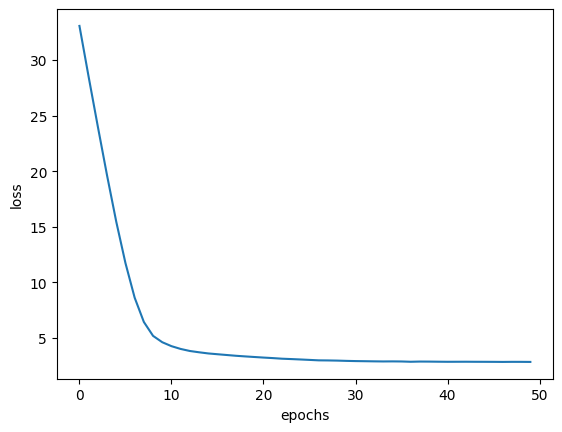

7/7 [==============================] - 0s 894us/step


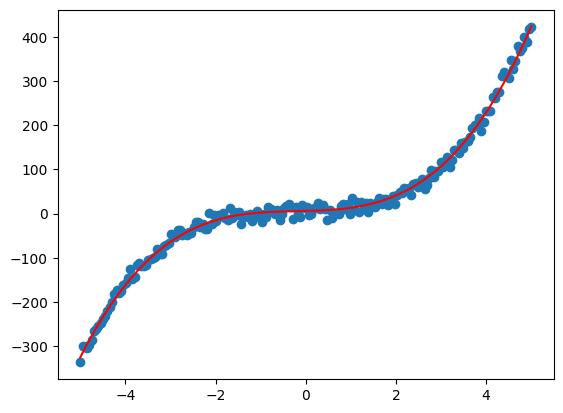

********************
opt: SGD, lr: 0.01, loss_fn: MAE, batch: 2
min_loss: 2.83, loss: 3.08
********************
opt: SGD, lr: 0.01, loss_fn: MAE, batch: 4
min_loss: 2.83, loss: 4.17
********************
opt: SGD, lr: 0.01, loss_fn: MAE, batch: 8
min_loss: 2.83, loss: 9.33
********************
opt: SGD, lr: 0.01, loss_fn: MAE, batch: 16
min_loss: 2.83, loss: 20.02
********************
opt: SGD, lr: 0.01, loss_fn: MSE, batch: 1
min_loss: 2.83, loss: 12.80
********************
opt: SGD, lr: 0.01, loss_fn: MSE, batch: 2
min_loss: 2.83, loss: 12.32
********************
opt: SGD, lr: 0.01, loss_fn: MSE, batch: 4
min_loss: 2.83, loss: 12.06
********************
opt: SGD, lr: 0.01, loss_fn: MSE, batch: 8
min_loss: 2.83, loss: 11.93
********************
opt: SGD, lr: 0.01, loss_fn: MSE, batch: 16
min_loss: 2.83, loss: 12.28
********************
opt: SGD, lr: 0.005, loss_fn: MAE, batch: 1
min_loss: 2.83, loss: 3.10
********************
opt: SGD, lr: 0.005, loss_fn: MAE, batch: 2
min_loss: 2.83, 

In [ ]:
def make_optimizer(name, lr):
  if name == 'Adam':
    return tf.keras.optimizers.Adam(learning_rate=lr)
  elif name == 'RMSprop':
    return tf.keras.optimizers.RMSprop(learning_rate=lr)
  elif name == 'SGD':
    return tf.keras.optimizers.SGD(learning_rate=lr)

def make_loss_func(name):
  if name == 'MAE':
    return tf.keras.losses.MeanAbsoluteError()
  elif name == 'MSE':
    return tf.keras.losses.MeanSquaredError()

def make_model(opt='Adam', lr='0.01', loss_fn='MSE', **kargs):
  model=tf.keras.Sequential(
        [tf.keras.layers.Dense(units=1,
                               bias_initializer=tf.keras.initializers.Constant(1),\
                               input_dim=3)])
  #print('opt: {}, lr: {}, loss_fn: {}'.format(opt, lr, loss_fn))
  opt = make_optimizer(opt, lr)
  loss = make_loss_func(loss_fn)
  model.compile(optimizer=opt, loss=loss)
  return model

def train(model, X, y, epochs=50, batch=1, callbacks=None, **kargs):
  #print('batch', batch)
  record = model.fit(X, y, epochs=epochs, batch_size=batch, callbacks=callbacks, verbose=0)
  return record

def plot_result(data, ylabel, xlabel='epochs'):
  plt.plot(data)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

def plot_predict(model, X_train, y_true):
  def standard_inverse(data, mean, std):
    return data * std + mean
  x_origin = standard_inverse(X_train[:,0], x_mean, x_std)
  y_origin = standard_inverse(y_true, y_label_mean, y_std)
  plt.scatter(x_origin, y_origin) 
  y_pred = model.predict(X_train)
  y_pred = standard_inverse(y_pred, y_mean, y_std)
  plt.plot(x_origin, y_pred, color='red')
  plt.show()

def get_result(model, record):
    loss = record.history['loss']
    weights = model.layers[0].weights[:-1][0].numpy() 
    bias = model.layers[0].weights[-1].numpy()
    return loss, weights, bias

def benchmark(X, y, params):
  import sys
  min_loss = sys.float_info.max 
  for param in params:
    print('*'*20)
    print('opt: {}, lr: {}, loss_fn: {}, batch: {}'\
          .format(param['opt'], param['lr'], param['loss_fn'], param['batch']))
    model = make_model(**param)
    record = train(model, X, y, **param)
    loss, weights, bias = get_result(model, record)
    print('min_loss: {:.2f}, loss: {:.2f}'.format(min_loss, loss[-1]))
    if loss[-1] < min_loss:
      print('loss: {:.2f}, weights: {}, bias: {}'.format(loss[-1], weights, bias))
      plot_result(loss, 'loss')
      plot_predict(model, X, y)
      min_loss = loss[-1]

benchmark(X, y_scaled, params)

# Step 13. Functional Model

## p.94

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def dataset(train_size=100): # tensorflow    
     tf.random.set_seed(1)
     x = tf.linspace(0.0, 10.0, num=train_size)
     y = 3.0*x - 10.0
     y += tf.random.normal([train_size], mean=0.0, stddev = 2.0)
     return x, y
x, y_true = dataset(20)

In [ ]:
inputs = tf.keras.layers.Input(shape=(1,))
##y = tf.keras.layers.Dense(units=1)  # ,input_shape=(1,))
##outputs = y(inputs)
outputs = tf.keras.layers.Dense(units=1)(inputs)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_266 (Dense)           (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
5/5 - 0s - loss: 122.6963 - 162ms/epoch - 32ms/step
Epoch 2/100
5/5 - 0s - loss: 67.7301 - 4ms/epoch - 804us/step
Epoch 3/100
5/5 - 0s - loss: 51.8029 - 4ms/epoch - 796us/step
Epoch 4/100
5/5 - 0s - loss: 44.6364 - 4ms/epoch - 793us/step
Epoch 5/100
5/5 - 0s - loss: 41.7709 - 5ms/epoch - 992us/step
Epoch 6/100
5/5 - 0s - loss: 39.5206 - 5ms/epoch - 1000us/step
Epoch 7/100
5/5 - 0s - loss: 36.2503 - 4ms/epoch - 794us/step
Epoch 8/100
5/5 - 0s - loss: 35.5005 - 5ms/epoch - 1ms/step
Epoch 9/100
5/5 - 0s - loss: 31.9889 - 5ms/epoch - 997us/step
Epoch 10/100
5/5 - 0s - loss: 30.4338 - 4ms/epoch - 792us/step
Epoch 11/100
5/5 - 0s - loss: 29.0852 - 5ms/epoch - 995us/step
Epoch 12/100
5/5 - 0s - loss: 27.3679 - 5ms/epoch - 996us/step
Epoch 13/100
5/5 - 0s - loss: 26.0642 - 4ms/epoch - 794us/step
Epoch 14/100
5/5 - 0s - loss: 24.1738 - 6ms/epoch - 1ms/step
Epoch 15/100
5/5 - 0s - loss: 22.3662 - 4ms/epoch - 788us/step
Epoch 16/100
5/5 - 0s - loss: 21.4526 - 5ms/epoch - 993us/step
Ep

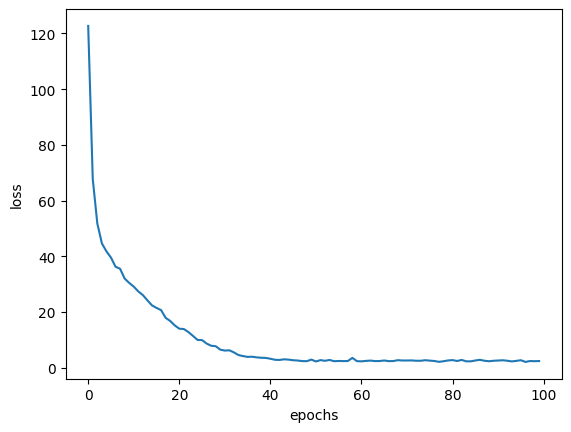

1/1 [==============================] - 0s 50ms/step


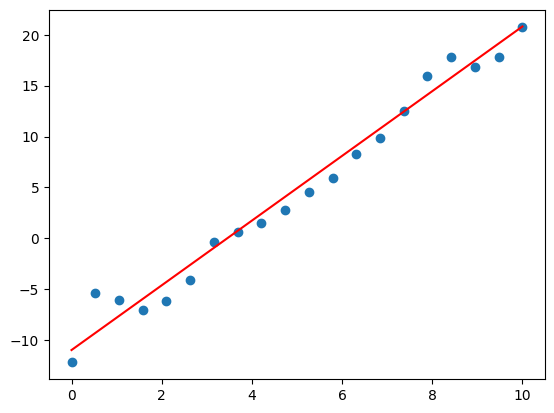

In [ ]:
##opt = tf.keras.optimizers.SGD(learning_rate=0.01)  # optimizer='sgd'
##opt = tf.keras.optimizers.Adam(learning_rate=0.01) # 'adam'
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1) # 'rmsprop'
model.compile(optimizer=opt, loss='mse') # 'mean_squared_error'

ret = model.fit(x, y_true, epochs=100, batch_size=4, verbose=2) #2: one line per epoch 
print("len(model.layers):", len(model.layers)) # 2

loss = ret.history['loss']
print("loss:", loss[-1])
#print(model.get_weights())  # weights, bias
print("weights:", model.layers[1].weights[0].numpy())
print("bias:", model.layers[1].weights[1].numpy()) # model.layers[1].bias.numpy()

plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

plt.scatter(x, y_true)
y_pred = model.predict(x)
plt.plot(x, y_pred, color='red')
plt.show()


## p.96

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

train_data = np.array([ # t = 1*x0 + 2*x1 + 3
#  x0, x1, t      
 [ 1,  0,  4],
 [ 2,  0,  5],
 [ 3,  0,  6],
 [ 4,  0,  7],
 [ 1,  1,  6],
 [ 2,  1,  7],
 [ 3,  1,  8],
 [ 4,  1,  9]], dtype=np.float32)

X      = train_data[:, :-1]
y_true = train_data[:, -1:]  # t
##y_true += np.reshape(np.random.randn(len(y_true))*2.0, (-1, 1)) 


In [ ]:
inputs = tf.keras.layers.Input(shape=(2,))
##y = tf.keras.layers.Dense(units=1)  # ,input_shape=(2,))
##outputs = y(inputs)
outputs = tf.keras.layers.Dense(units=1)(inputs)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_267 (Dense)           (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
2/2 - 0s - loss: 10.2007 - 133ms/epoch - 66ms/step
Epoch 2/100
2/2 - 0s - loss: 3.1928 - 16ms/epoch - 8ms/step
Epoch 3/100
2/2 - 0s - loss: 1.9444 - 4ms/epoch - 2ms/step
Epoch 4/100
2/2 - 0s - loss: 1.6390 - 3ms/epoch - 1ms/step
Epoch 5/100
2/2 - 0s - loss: 1.4303 - 2ms/epoch - 1ms/step
Epoch 6/100
2/2 - 0s - loss: 1.3559 - 3ms/epoch - 2ms/step
Epoch 7/100
2/2 - 0s - loss: 1.1953 - 3ms/epoch - 1ms/step
Epoch 8/100
2/2 - 0s - loss: 1.0467 - 2ms/epoch - 985us/step
Epoch 9/100
2/2 - 0s - loss: 0.9068 - 2ms/epoch - 997us/step
Epoch 10/100
2/2 - 0s - loss: 0.8036 - 2ms/epoch - 997us/step
Epoch 11/100
2/2 - 0s - loss: 0.7217 - 3ms/epoch - 1ms/step
Epoch 12/100
2/2 - 0s - loss: 0.6462 - 3ms/epoch - 1ms/step
Epoch 13/100
2/2 - 0s - loss: 0.5818 - 2ms/epoch - 997us/step
Epoch 14/100
2/2 - 0s - loss: 0.4649 - 2ms/epoch - 997us/step
Epoch 15/100
2/2 - 0s - loss: 0.5282 - 3ms/epoch - 1ms/step
Epoch 16/100
2/2 - 0s - loss: 0.3275 - 0s/epoch - 0s/step
Epoch 17/100
2/2 - 0s - loss: 0.2882

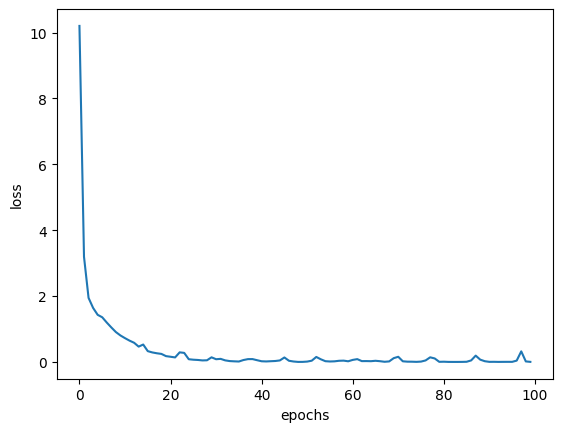

In [ ]:
##opt = tf.keras.optimizers.SGD(learning_rate=0.01)  # optimizer='sgd'
##opt = tf.keras.optimizers.Adam(learning_rate=0.01) # 'adam'
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1) # 'rmsprop'
model.compile(optimizer=opt, loss='mse') # 'mean_squared_error'

ret = model.fit(X, y_true, epochs=100, batch_size=4, verbose=2) # 2: one line per epoch
y_pred = model.predict(X)
print("y_pred:", y_pred)
print("len(model.layers):", len(model.layers)) # 2

loss = ret.history['loss']
print("loss:", loss[-1])
#print(model.get_weights())
print("weights:", model.layers[1].weights[0].numpy())
print("bias:", model.layers[1].weights[1].numpy()) # model.layers[1].bias.numpy()

plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

## p.98

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def dataset(train_size=100): # tensorflow    
     tf.random.set_seed(1)
     x = tf.linspace(-5.0, 5.0, num=train_size)
     y = 3.0*x**3 + 2.0*x**2 + x + 4.0
     y += tf.random.normal([train_size], mean=0.0, stddev = 30.0)
     return x, y
x, y_true = dataset(20)
##x /= max(x)       # 정규화
##y_true /= max(y_true)

# n-차 다항식 회귀
n = 3
X = np.ones(shape = (len(x), n+1), dtype=np.float32)
##X[:, 0] = 1.0
##X[:, 1] = x
##X[:, 2] = x**2
##X[:, 3] = x**3
for i in range(1, n+1):
     X[:, i] = x**i

In [ ]:
inputs = tf.keras.layers.Input(shape=(n+1,))
outputs = tf.keras.layers.Dense(units=1, use_bias=False)(inputs)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_268 (Dense)           (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
1/1 - 0s - loss: 16426.0508 - 151ms/epoch - 151ms/step
Epoch 2/100
1/1 - 0s - loss: 12078.2793 - 3ms/epoch - 3ms/step
Epoch 3/100
1/1 - 0s - loss: 9559.2402 - 2ms/epoch - 2ms/step
Epoch 4/100
1/1 - 0s - loss: 7785.5063 - 2ms/epoch - 2ms/step
Epoch 5/100
1/1 - 0s - loss: 6436.9385 - 2ms/epoch - 2ms/step
Epoch 6/100
1/1 - 0s - loss: 5369.6738 - 2ms/epoch - 2ms/step
Epoch 7/100
1/1 - 0s - loss: 4504.8774 - 2ms/epoch - 2ms/step
Epoch 8/100
1/1 - 0s - loss: 3793.8667 - 567us/epoch - 567us/step
Epoch 9/100
1/1 - 0s - loss: 3204.0352 - 0s/epoch - 0s/step
Epoch 10/100
1/1 - 0s - loss: 2712.2004 - 0s/epoch - 0s/step
Epoch 11/100
1/1 - 0s - loss: 2301.1069 - 0s/epoch - 0s/step
Epoch 12/100
1/1 - 0s - loss: 1957.4280 - 0s/epoch - 0s/step
Epoch 13/100
1/1 - 0s - loss: 1670.5612 - 16ms/epoch - 16ms/step
Epoch 14/100
1/1 - 0s - loss: 1431.8591 - 1ms/epoch - 1ms/step
Epoch 15/100
1/1 - 0s - loss: 1234.1310 - 2ms/epoch - 2ms/step
Epoch 16/100
1/1 - 0s - loss: 1071.2906 - 978us/epoch - 978u

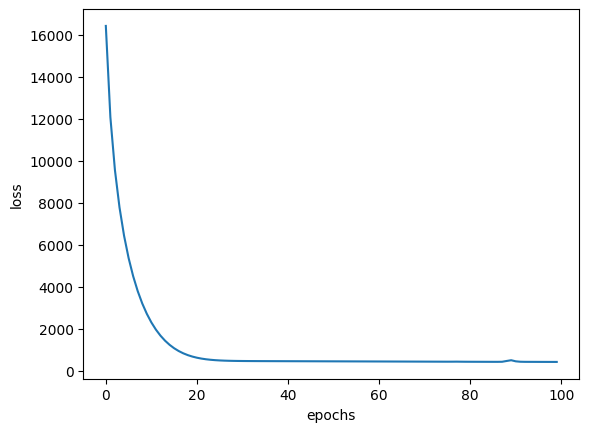

1/1 [==============================] - 0s 25ms/step


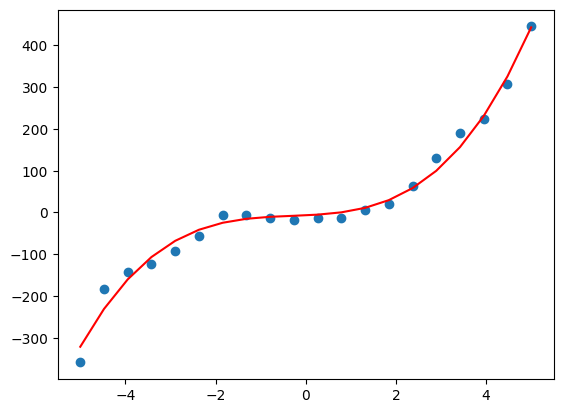

In [ ]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse')
ret = model.fit(X, y_true, epochs=100, verbose=2)
print("len(model.layers):", len(model.layers)) # 2

loss = ret.history['loss']
print("loss:", loss[-1])
#print(model.get_weights())  # weights
print("weights:", model.layers[1].weights[0].numpy())

plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

plt.scatter(x, y_true) 
y_pred = model.predict(X)
plt.plot(x, y_pred, color='red')
plt.show()


# Step 14. Save and Load Models

## p.102 

### 1~24 line - polynomial regression

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def dataset(train_size=100): # tensorflow    
     tf.random.set_seed(1)
     x = tf.linspace(-5.0, 5.0, num=train_size)
     y = 3.0*x**3 + 2.0*x**2 + x + 4.0
     y += tf.random.normal([train_size], mean=0.0, stddev = 30.0)
     return x, y

x, y_true = dataset(20)

# n-차 다항식 회귀
n = 3
X = np.ones(shape = (len(x), n+1), dtype=np.float32)
for i in range(1, n+1):
     X[:, i] = x**i

inputs = tf.keras.layers.Input(shape=(n+1,))
outputs = tf.keras.layers.Dense(units=1, use_bias=False)(inputs)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse')
ret = model.fit(X, y_true, epochs=100, verbose=2)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_22 (Dense)            (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 - 0s - loss: 16916.8477 - 173ms/epoch - 173ms/step
Epoch 2/100
1/1 - 0s - loss: 12510.7852 - 2ms/epoch - 2ms/step
Epoch 3/100
1/1 - 0s - loss: 9949.9893 - 2ms/epoch - 2ms/step
Epoch 4/100
1/1 - 0s - loss: 8142.2178 - 2ms/epoch - 2ms/step
Epoch 5/100
1/1 - 0s - loss: 6764.4209 - 2ms/epoch - 2ms/step
Epoch 6/100
1/1 - 0s - loss: 5671.3711 - 3ms/epoch - 3ms/step
Epoch 7/100
1/1 - 0s - loss: 4783.4766 - 2ms/epoch - 2ms/step
Epoch 8/100
1/1 - 0s - 

### 26~40 line - save a model

In [ ]:
#1: 모델 전체 저장
#import os
#if not os.path.exists("./RES"):
#     os.mkdir("./RES")
model.save("./RES/1401.h5")   # HDF5, keras format

#2: 모델 구조 저장
json_string = model.to_json()
import json
with open("./RES/1401.model", 'w') as f_read:
  json.dump(json_string, f_read)
 
#3: 가중치 저장
model.save_weights("./RES/weights/1401")

### 42~46 line - checkpoint

In [ ]:
#4: 학습중에 체크포인트 저장
filepath = "RES/ckpt/1401-{epoch:04d}.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath,
    verbose=0,
    save_weights_only=True,
    save_freq=5,
    )
ret = model.fit(X, y_true, epochs=100, callbacks = [cp_callback], verbose=0)

In [ ]:
!cat ./RES/1401.model

"{\"class_name\": \"Functional\", \"config\": {\"name\": \"model\", \"trainable\": true, \"layers\": [{\"class_name\": \"InputLayer\", \"config\": {\"batch_input_shape\": [null, 4], \"dtype\": \"float32\", \"sparse\": false, \"ragged\": false, \"name\": \"input_1\"}, \"name\": \"input_1\", \"inbound_nodes\": []}, {\"class_name\": \"Dense\", \"config\": {\"name\": \"dense_22\", \"trainable\": true, \"dtype\": \"float32\", \"units\": 1, \"activation\": \"linear\", \"use_bias\": false, \"kernel_initializer\": {\"class_name\": \"GlorotUniform\", \"config\": {\"seed\": null}}, \"bias_initializer\": {\"class_name\": \"Zeros\", \"config\": {}}, \"kernel_regularizer\": null, \"bias_regularizer\": null, \"activity_regularizer\": null, \"kernel_constraint\": null, \"bias_constraint\": null}, \"name\": \"dense_22\", \"inbound_nodes\": [[[\"input_1\", 0, 0, {}]]]}], \"input_layers\": [[\"input_1\", 0, 0]], \"output_layers\": [[\"dense_22\", 0, 0]]}, \"keras_version\": \"2.12.0\", \"backend\": \"te

In [ ]:
!ls ./RES

1401.h5  1401.model  ckpt  weights


In [ ]:
!ls ./RES/ckpt

1401-0005.ckpt.data-00000-of-00001  1401-0055.ckpt.index
1401-0005.ckpt.index		    1401-0060.ckpt.data-00000-of-00001
1401-0010.ckpt.data-00000-of-00001  1401-0060.ckpt.index
1401-0010.ckpt.index		    1401-0065.ckpt.data-00000-of-00001
1401-0015.ckpt.data-00000-of-00001  1401-0065.ckpt.index
1401-0015.ckpt.index		    1401-0070.ckpt.data-00000-of-00001
1401-0020.ckpt.data-00000-of-00001  1401-0070.ckpt.index
1401-0020.ckpt.index		    1401-0075.ckpt.data-00000-of-00001
1401-0025.ckpt.data-00000-of-00001  1401-0075.ckpt.index
1401-0025.ckpt.index		    1401-0080.ckpt.data-00000-of-00001
1401-0030.ckpt.data-00000-of-00001  1401-0080.ckpt.index
1401-0030.ckpt.index		    1401-0085.ckpt.data-00000-of-00001
1401-0035.ckpt.data-00000-of-00001  1401-0085.ckpt.index
1401-0035.ckpt.index		    1401-0090.ckpt.data-00000-of-00001
1401-0040.ckpt.data-00000-of-00001  1401-0090.ckpt.index
1401-0040.ckpt.index		    1401-0095.ckpt.data-00000-of-00001
1401-0045.ckpt.data-00000-of-00001  1401-0095.ckpt.index

### Note - Checkpoint Callback

In [ ]:
def create_checkpoint_callback(path, monitor='loss',\
                               save_best_only=True,\
                               save_weights_only=False,\
                               save_freq='epoch', **kargs):
  import os
  checkpoint_path = path
  checkpoint_dir = os.path.dirname(checkpoint_path)

  # Create a callback that saves the model's weights
  cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                  monitor=monitor,
                                                  save_best_only = save_best_only,
                                                  save_weights_only=save_weights_only,
                                                  verbose=1)
  return cp_callback

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback_best = create_checkpoint_callback(checkpoint_path)

In [ ]:
# Train the model with the new callback
model.fit(X, 
          y_true, 
          epochs=10, 
          callbacks=[cp_callback_best],  # Pass callback to training
          )

In [ ]:
import os
os.listdir(checkpoint_dir)

### Benchmark.train() - cp_callback_best

In [ ]:
train(model, 
      X, 
      y_true, 
      epochs=60, 
      callbacks=[cp_callback_best],
      )

In [ ]:
import os
os.listdir(checkpoint_dir)

['cp.ckpt.index', 'cp.ckpt.data-00000-of-00001', 'cp.ckpt', 'checkpoint']

In [ ]:
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback_epochs_5 = create_checkpoint_callback(checkpoint_dir, save_freq=5)
# Train the model with the new callback
model.fit(X,
          y_true,
          epochs=10,
          callbacks=[cp_callback_epochs_5],  # Pass callback to training
          )  

In [ ]:
import os
os.listdir(checkpoint_dir)

### Benchmark.train() - cp_callback_epochs_5

In [ ]:
train(model,
      X,
      y_true,
      callbacks=[cp_callback_epochs_5], # Pass callback to training
      )

In [ ]:
import os
os.listdir(checkpoint_dir)

## Note - Save and Load Models

https://www.tensorflow.org/tutorials/keras/save_and_load

### import

In [ ]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2023-04-22 16:51:34.754274: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-22 16:51:34.782360: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-22 16:51:35.246042: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.12.0


### dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.0
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.0

### model & configure

In [ ]:
# Define a simple sequential model
def create_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

  return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


2023-04-22 16:51:43.679897: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-22 16:51:43.695794: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-22 16:51:43.695930: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

### save - ModelCheckpoint

* save_best_only : if save_best_only=True, it only saves when the model is considered the "best" and the latest best model according to the quantity monitored will not be overwritten.

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
import os

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 monitor='loss',
                                                 save_best_only = True,
                                                 #save_weights_only=True,
                                                 verbose=1)

### train

In [ ]:
# Train the model with the new callback
model.fit(train_images, 
          train_labels,  
          epochs=10,
          validation_data=(test_images, test_labels),
          callbacks=[cp_callback],
          )  # Pass callback to training

Epoch 1/10


2023-04-22 16:51:50.292182: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-04-22 16:51:50.293807: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7fa94230e5b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-04-22 16:51:50.293822: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2023-04-22 16:51:50.296425: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-04-22 16:51:50.389736: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-04-22 16:51:50.424684: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-04-22 16:51:50.45944

 1/32 [..............................] - ETA: 33s - loss: 2.5391 - sparse_categorical_accuracy: 0.0938
Epoch 1: loss improved from inf to 1.14174, saving model to training_1/cp.ckpt


2023-04-22 16:51:50.923222: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-04-22 16:51:51.006801: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets
32/32 [==============================] - 2s 15ms/step - loss: 1.1417 - sparse_categorical_accuracy: 0.6660 - val_loss: 0.7193 - val_sparse_categorical_accuracy: 0.7760
Epoch 2/10
 1/32 [..............................] - ETA: 0s - loss: 0.2740 - sparse_categorical_accuracy: 0.9688
Epoch 2: loss improved from 1.14174 to 0.43069, saving model to training_1/cp.ckpt


2023-04-22 16:51:51.255217: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-04-22 16:51:51.310715: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets
32/32 [==============================] - 0s 11ms/step - loss: 0.4307 - sparse_categorical_accuracy: 0.8810 - val_loss: 0.5352 - val_sparse_categorical_accuracy: 0.8220
Epoch 3/10
 1/32 [..............................] - ETA: 0s - loss: 0.3775 - sparse_categorical_accuracy: 0.8750
Epoch 3: loss improved from 0.43069 to 0.28110, saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets
32/32 [==============================] - 0s 9ms/step - loss: 0.2811 - sparse_categorical_accuracy: 0.9320 - val_loss: 0.4693 - val_sparse_categorical_accuracy: 0.8420
Epoch 4/10
 1/32 [..............................] - ETA: 0s - loss: 0.1112 - sparse_categorical_accuracy: 1.0000

2023-04-22 16:51:51.609646: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-04-22 16:51:51.668629: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]



Epoch 4: loss improved from 0.28110 to 0.21318, saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets
32/32 [==============================] - 0s 9ms/step - loss: 0.2132 - sparse_categorical_accuracy: 0.9440 - val_loss: 0.4427 - val_sparse_categorical_accuracy: 0.8620
Epoch 5/10
 1/32 [..............................] - ETA: 0s - loss: 0.1139 - sparse_categorical_accuracy: 1.0000

2023-04-22 16:51:51.897127: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-04-22 16:51:51.952610: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]



Epoch 5: loss improved from 0.21318 to 0.16841, saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets
32/32 [==============================] - 0s 9ms/step - loss: 0.1684 - sparse_categorical_accuracy: 0.9650 - val_loss: 0.4366 - val_sparse_categorical_accuracy: 0.8630
Epoch 6/10
 1/32 [..............................] - ETA: 0s - loss: 0.1313 - sparse_categorical_accuracy: 1.0000

2023-04-22 16:51:52.184303: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-04-22 16:51:52.241936: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]



Epoch 6: loss improved from 0.16841 to 0.11295, saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets
32/32 [==============================] - 0s 9ms/step - loss: 0.1129 - sparse_categorical_accuracy: 0.9800 - val_loss: 0.4219 - val_sparse_categorical_accuracy: 0.8610
Epoch 7/10
 1/32 [..............................] - ETA: 0s - loss: 0.0533 - sparse_categorical_accuracy: 1.0000

2023-04-22 16:51:52.475791: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-04-22 16:51:52.530904: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]



Epoch 7: loss improved from 0.11295 to 0.08347, saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets
32/32 [==============================] - 0s 9ms/step - loss: 0.0835 - sparse_categorical_accuracy: 0.9870 - val_loss: 0.4176 - val_sparse_categorical_accuracy: 0.8650
Epoch 8/10
 1/32 [..............................] - ETA: 0s - loss: 0.1144 - sparse_categorical_accuracy: 0.9688

2023-04-22 16:51:52.751852: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-04-22 16:51:52.805846: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]



Epoch 8: loss improved from 0.08347 to 0.06708, saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets
32/32 [==============================] - 0s 9ms/step - loss: 0.0671 - sparse_categorical_accuracy: 0.9930 - val_loss: 0.4133 - val_sparse_categorical_accuracy: 0.8610
Epoch 9/10
 1/32 [..............................] - ETA: 0s - loss: 0.0369 - sparse_categorical_accuracy: 1.0000

2023-04-22 16:51:53.034303: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-04-22 16:51:53.089267: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]



Epoch 9: loss improved from 0.06708 to 0.05231, saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets
32/32 [==============================] - 0s 9ms/step - loss: 0.0523 - sparse_categorical_accuracy: 0.9980 - val_loss: 0.4208 - val_sparse_categorical_accuracy: 0.8650
Epoch 10/10
 1/32 [..............................] - ETA: 0s - loss: 0.0300 - sparse_categorical_accuracy: 1.0000

2023-04-22 16:51:53.316463: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-04-22 16:51:53.372558: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]



Epoch 10: loss improved from 0.05231 to 0.04352, saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets
32/32 [==============================] - 0s 9ms/step - loss: 0.0435 - sparse_categorical_accuracy: 0.9990 - val_loss: 0.4103 - val_sparse_categorical_accuracy: 0.8700


2023-04-22 16:51:53.597361: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-04-22 16:51:53.651946: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]


### Protocol Buffer

https://en.wikipedia.org/wiki/Protocol_Buffers

Protocol Buffers (Protobuf) is a free and open-source cross-platform data format used to serialize structured data.


In [ ]:
# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.
os.listdir(os.path.dirname(checkpoint_path+'/'))

['saved_model.pb',
 'fingerprint.pb',
 'assets',
 'keras_metadata.pb',
 'variables']

### load - model.load_weights()

In [ ]:
# Create a basic model instance
model = create_model()

# Evaluate the model
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))


# Loads the weights
model.load_weights(checkpoint_path)

# Re-evaluate the model
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

32/32 - 0s - loss: 2.3754 - sparse_categorical_accuracy: 0.0580 - 72ms/epoch - 2ms/step
Untrained model, accuracy:  5.80%
32/32 - 0s - loss: 0.4037 - sparse_categorical_accuracy: 0.8710 - 29ms/epoch - 892us/step
Restored model, accuracy: 87.10%


### save - ModelCheckpoint

save_freq:

* 'epoch' or integer. When using 'epoch', the callback saves the model after each epoch. 

* When using integer, the callback saves the model at end of this many batches. 

In [ ]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

epochs = 5
batch_size = 32
steps = train_images.shape[0] / batch_size

# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    #save_freq=epochs * steps,   
    save_freq='epoch', period=5,
    )

# Create a new model instance
model = create_model()

# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

# Train the model with the new callback
model.fit(train_images, 
          train_labels,
          epochs=50, 
          batch_size=batch_size, 
          callbacks=[cp_callback],
          validation_data=(test_images, test_labels),
          verbose=2)

Epoch 1/50
32/32 - 1s - loss: 1.1168 - sparse_categorical_accuracy: 0.6920 - val_loss: 0.7123 - val_sparse_categorical_accuracy: 0.7660 - 508ms/epoch - 16ms/step
Epoch 2/50
32/32 - 0s - loss: 0.4045 - sparse_categorical_accuracy: 0.8910 - val_loss: 0.5790 - val_sparse_categorical_accuracy: 0.8190 - 55ms/epoch - 2ms/step
Epoch 3/50
32/32 - 0s - loss: 0.2843 - sparse_categorical_accuracy: 0.9280 - val_loss: 0.5110 - val_sparse_categorical_accuracy: 0.8370 - 54ms/epoch - 2ms/step
Epoch 4/50
32/32 - 0s - loss: 0.2070 - sparse_categorical_accuracy: 0.9430 - val_loss: 0.4524 - val_sparse_categorical_accuracy: 0.8560 - 53ms/epoch - 2ms/step
Epoch 5/50

Epoch 5: saving model to training_2/cp-0005.ckpt
32/32 - 0s - loss: 0.1417 - sparse_categorical_accuracy: 0.9700 - val_loss: 0.4393 - val_sparse_categorical_accuracy: 0.8560 - 74ms/epoch - 2ms/step
Epoch 6/50
32/32 - 0s - loss: 0.1102 - sparse_categorical_accuracy: 0.9760 - val_loss: 0.4296 - val_sparse_categorical_accuracy: 0.8530 - 68ms/epoch

In [ ]:
os.listdir(checkpoint_dir)

['cp-0050.ckpt.data-00000-of-00001',
 'cp-0040.ckpt.data-00000-of-00001',
 'cp-0015.ckpt.index',
 'cp-0005.ckpt.index',
 'cp-0025.ckpt.data-00000-of-00001',
 'cp-0045.ckpt.data-00000-of-00001',
 'saved_model.pb',
 'cp-0045.ckpt.index',
 'cp-0040.ckpt.index',
 'fingerprint.pb',
 'cp-0005.ckpt.data-00000-of-00001',
 'cp-0000.ckpt.data-00000-of-00001',
 'cp-0000.ckpt.index',
 'assets',
 'cp-0010.ckpt.data-00000-of-00001',
 'cp-0030.ckpt.data-00000-of-00001',
 'cp-0020.ckpt.data-00000-of-00001',
 'cp.ckpt',
 'cp-0015.ckpt.data-00000-of-00001',
 'cp-0035.ckpt.index',
 'checkpoint',
 'cp-0025.ckpt.index',
 'cp-0035.ckpt.data-00000-of-00001',
 'cp-0030.ckpt.index',
 'keras_metadata.pb',
 'cp-0020.ckpt.index',
 'cp-0050.ckpt.index',
 'variables',
 'cp-0010.ckpt.index']

### load - tf.train.latest_checkpoint()

In [ ]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

# Create a new model instance
model = create_model()

# Load the previously saved weights
model.load_weights(latest)

# Re-evaluate the model
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

32/32 - 0s - loss: 0.4839 - sparse_categorical_accuracy: 0.8770 - 69ms/epoch - 2ms/step
Restored model, accuracy: 87.70%


### Manually save weights

In [ ]:
# Save the weights
model.save_weights('./checkpoints/my_checkpoint')

# Create a new model instance
model = create_model()

# Restore the weights
model.load_weights('./checkpoints/my_checkpoint')

# Evaluate the model
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

32/32 - 0s - loss: 0.5060 - sparse_categorical_accuracy: 0.8720 - 69ms/epoch - 2ms/step
Restored model, accuracy: 87.20%


### SavedModel format - model.save()

The TensorFlow SavedModel format is the default file format in TF2.x.

The SavedModel format is a directory containing a protobuf binary and a TensorFlow checkpoint.

In [ ]:
# Create and train a new model instance.
model = create_model()
model.fit(train_images, train_labels, epochs=5)

# Save the entire model as a SavedModel.
# !mkdir -p saved_model
model.save('saved_model/my_model')

Epoch 1/5
32/32 [==============================] - 0s 991us/step - loss: 1.1700 - sparse_categorical_accuracy: 0.6690
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.4247 - sparse_categorical_accuracy: 0.8810
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.2867 - sparse_categorical_accuracy: 0.9190
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.2046 - sparse_categorical_accuracy: 0.9500
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.1521 - sparse_categorical_accuracy: 0.9720
INFO:tensorflow:Assets written to: saved_model/my_model/assets


2023-04-22 17:19:37.421147: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-04-22 17:19:37.482581: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]


In [ ]:
# Evaluate the model
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))
print(model.predict(test_images).shape)

32/32 - 0s - loss: 0.4340 - sparse_categorical_accuracy: 0.8540 - 75ms/epoch - 2ms/step
Restored model, accuracy: 85.40%
32/32 [==============================] - 0s 546us/step
(1000, 10)


In [ ]:
# my_model directory
!ls saved_model/

my_model


In [ ]:
# Contains an assets folder, saved_model.pb, and variables folder.
!ls saved_model/my_model

assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


### load - tf.keras.models.load_model()

In [ ]:
new_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
new_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               401920    
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluate the restored model
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))
print(new_model.predict(test_images).shape)

32/32 - 0s - loss: 0.4340 - sparse_categorical_accuracy: 0.8540 - 73ms/epoch - 2ms/step
Restored model, accuracy: 85.40%
32/32 [==============================] - 0s 486us/step
(1000, 10)


### HDF5 format - model.save()

Keras provides a basic save format using the HDF5 standard.

Keras saves models by inspecting their architectures. This technique saves everything:

* The weight values
* The model's architecture
* The model's training configuration (what you pass to the .compile() method)
* The optimizer and its state, if any (this enables you to restart training where you left off)

In [ ]:
# Create and train a new model instance.
model = create_model()
model.fit(train_images, train_labels, epochs=5)

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('saved_model/my_model_h5/my_model.h5')

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 1.1555 - sparse_categorical_accuracy: 0.6740
Epoch 2/5
32/32 [==============================] - 0s 978us/step - loss: 0.4272 - sparse_categorical_accuracy: 0.8900
Epoch 3/5
32/32 [==============================] - 0s 927us/step - loss: 0.2870 - sparse_categorical_accuracy: 0.9170
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.1954 - sparse_categorical_accuracy: 0.9560
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.1423 - sparse_categorical_accuracy: 0.9730


In [ ]:
# Evaluate the model
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))
print(model.predict(test_images).shape)

32/32 - 0s - loss: 0.4170 - sparse_categorical_accuracy: 0.8710 - 29ms/epoch - 919us/step
Restored model, accuracy: 87.10%
32/32 [==============================] - 0s 509us/step
(1000, 10)


### load - tf.keras.models.load_model()

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('saved_model/my_model_h5/my_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 512)               401920    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluate the restored model
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))
print(new_model.predict(test_images).shape)

32/32 - 0s - loss: 0.4170 - sparse_categorical_accuracy: 0.8710 - 73ms/epoch - 2ms/step
Restored model, accuracy: 87.10%
32/32 [==============================] - 0s 423us/step
(1000, 10)


## p. 104

### 1~18 line - import, dataset

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def dataset(train_size=100): # tensorflow    
     tf.random.set_seed(1)
     x = tf.linspace(-5.0, 5.0, num=train_size)
     y = 3.0*x**3 + 2.0*x**2 + x + 4.0
     y += tf.random.normal([train_size], mean=0.0, stddev = 30.0)
     return x, y
x, y_true = dataset(20)

# n-차 다항식 회귀
n = 3
X = np.ones(shape = (len(x), n+1), dtype=np.float32)
for i in range(1, n+1):
     X[:, i] = x**i

### 20~21 line - load a model

tf.keras.models.load_model()

In [5]:
#1: 모델 전체 로드
model = tf.keras.models.load_model("./RES/1401.h5")

In [8]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_128 (Dense)           (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


### 23~29 line - loss

In [6]:
#2: 모델 평가, 예측, 그래프 표시
loss = model.evaluate(X, y_true, verbose=0) # 0 = silent
print("loss:", loss)

print("len(model.layers):", len(model.layers)) # 2
#print(model.get_weights())  # weights
print("weights:", model.layers[1].weights[0].numpy())

loss: 430.5274963378906
len(model.layers): 2
weights: [[-3.0055687]
 [ 4.877144 ]
 [ 2.5069065]
 [ 2.877365 ]]


### 31~35 line - plot

1/1 [==============================] - 0s 77ms/step


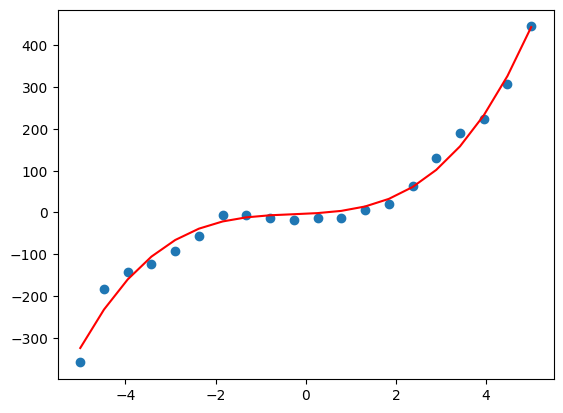

In [7]:
#3: 예측, 그래프 표시
plt.scatter(x, y_true)
y_pred = model.predict(X)
plt.plot(x, y_pred, color='red')
plt.show()

## p. 105

### 1~18 line import, dataset

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def dataset(train_size=100): # tensorflow    
     tf.random.set_seed(1)
     x = tf.linspace(-5.0, 5.0, num=train_size)
     y = 3.0*x**3 + 2.0*x**2 + x + 4.0
     y += tf.random.normal([train_size], mean=0.0, stddev = 30.0)
     return x, y
x, y_true = dataset(20)

# n-차 다항식 회귀
n = 3
X = np.ones(shape = (len(x), n+1), dtype=np.float32)
for i in range(1, n+1):
     X[:, i] = x**i

### 25~31 line - model

In [ ]:
#1: 모델 구조 로드
import json
file = open("./RES/1401.model", 'r')
json_model = json.load(file)
file.close()
model = tf.keras.models.model_from_json(json_model)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_22 (Dense)            (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


### 34~35 line - configure

In [ ]:
#2
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse')

### 37~38 line - load

In [ ]:
#3
model.load_weights("./RES/weights/1401")    # 가중치 로드 

### 39~43 line - loss

In [ ]:
loss = model.evaluate(X, y_true, verbose=0) # 0 = silent
print("loss:", loss)
print("len(model.layers):", len(model.layers)) # 1
#print(model.get_weights())  # weights
print("weights:", model.layers[1].weights[0].numpy())

loss: 430.5025329589844
len(model.layers): 2
weights: [[-4.3677807]
 [ 4.1672072]
 [ 2.5825624]
 [ 2.9005876]]


### 46~49 line - plot

1/1 [==============================] - 0s 21ms/step


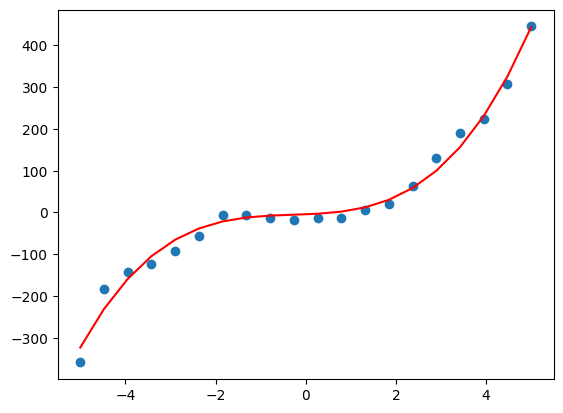

In [ ]:
#4
y_pred = model.predict(X)
plt.scatter(x, y_true) 
plt.plot(x, y_pred, color='red')
plt.show()

## p.106

### 1~18 line - import, dataset

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def dataset(train_size=100): # tensorflow    
     tf.random.set_seed(1)
     x = tf.linspace(-5.0, 5.0, num=train_size)
     y = 3.0*x**3 + 2.0*x**2 + x + 4.0
     y += tf.random.normal([train_size], mean=0.0, stddev = 30.0)
     return x, y
x, y_true = dataset(20)

# n-차 다항식 회귀
n = 3
X = np.ones(shape = (len(x), n+1), dtype=np.float32)
for i in range(1, n+1):
     X[:, i] = x**i

### 25~31 line - model

In [ ]:
#1: 모델 구조 로드
import json
file = open("./RES/1401.model", 'r')
json_model = json.load(file)
file.close()
model = tf.keras.models.model_from_json(json_model)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_22 (Dense)            (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


### 33~35 line - confiure

In [ ]:
#2
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse')

### 37~40 line - load

In [ ]:
#3
latest = tf.train.latest_checkpoint("./RES/ckpt")
print('latest=', latest)
model.load_weights(latest) # 가중치 로드 

latest= ./RES/ckpt/1401-0100.ckpt


### 41~45 line - loss

In [ ]:
loss = model.evaluate(X, y_true, verbose=0) # 0 = silent
print("loss:", loss)
print("len(model.layers):", len(model.layers)) # 2
#print(model.get_weights())  # weights
print("weights:", model.layers[1].weights[0].numpy())

loss: 421.37640380859375
len(model.layers): 2
weights: [[-8.21855  ]
 [ 6.759596 ]
 [ 2.7704864]
 [ 2.72804  ]]


### 47~51 line - plot

1/1 [==============================] - 0s 20ms/step


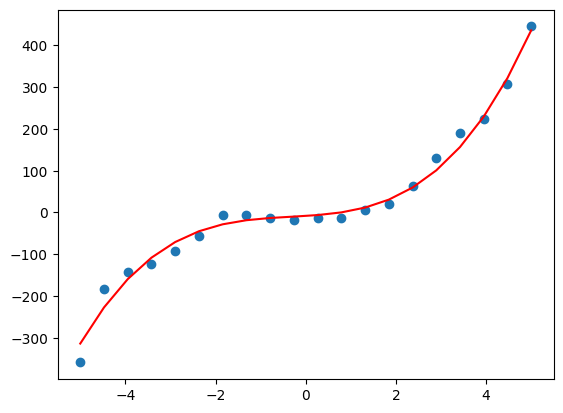

In [ ]:
#4
y_pred = model.predict(X)
plt.scatter(x, y_true) 
plt.plot(x, y_pred, color='red')
plt.show()

## p.107

### 1~18 line - import, dataset

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def dataset(train_size=100): # tensorflow    
     tf.random.set_seed(1)
     x = tf.linspace(-5.0, 5.0, num=train_size)
     y = 3.0*x**3 + 2.0*x**2 + x + 4.0
     y += tf.random.normal([train_size], mean=0.0, stddev = 30.0)
     return x, y
x, y_true = dataset(20)

# n-차 다항식 회귀
n = 3
X = np.ones(shape = (len(x), n+1), dtype=np.float32)
for i in range(1, n+1):
     X[:, i] = x**i

### 20~23 line - model

In [10]:
inputs = tf.keras.layers.Input(shape=(n+1,))
outputs = tf.keras.layers.Dense(units=1, use_bias=False)(inputs)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


### 25~26 line - configure

In [11]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse')

### 27 line - train

In [12]:
ret = model.fit(X, y_true, epochs=100, verbose=2)

Epoch 1/100
1/1 - 0s - loss: 14176.0254 - 339ms/epoch - 339ms/step
Epoch 2/100
1/1 - 0s - loss: 10173.8799 - 25ms/epoch - 25ms/step
Epoch 3/100
1/1 - 0s - loss: 7902.3047 - 0s/epoch - 0s/step
Epoch 4/100
1/1 - 0s - loss: 6330.1084 - 0s/epoch - 0s/step
Epoch 5/100
1/1 - 0s - loss: 5154.4292 - 16ms/epoch - 16ms/step
Epoch 6/100
1/1 - 0s - loss: 4239.4766 - 3ms/epoch - 3ms/step
Epoch 7/100
1/1 - 0s - loss: 3510.8813 - 2ms/epoch - 2ms/step
Epoch 8/100
1/1 - 0s - loss: 2922.7012 - 2ms/epoch - 2ms/step
Epoch 9/100
1/1 - 0s - loss: 2444.1326 - 2ms/epoch - 2ms/step
Epoch 10/100
1/1 - 0s - loss: 2053.2366 - 2ms/epoch - 2ms/step
Epoch 11/100
1/1 - 0s - loss: 1733.6598 - 2ms/epoch - 2ms/step
Epoch 12/100
1/1 - 0s - loss: 1472.7625 - 1ms/epoch - 1ms/step
Epoch 13/100
1/1 - 0s - loss: 1260.4863 - 0s/epoch - 0s/step
Epoch 14/100
1/1 - 0s - loss: 1088.6479 - 0s/epoch - 0s/step
Epoch 15/100
1/1 - 0s - loss: 950.4656 - 0s/epoch - 0s/step
Epoch 16/100
1/1 - 0s - loss: 840.2446 - 12ms/epoch - 12ms/step
E

### 29~46 line - freezing

In [13]:
#모델 동결(Freezing)
#ref1: https://github.com/leimao/Frozen_Graph_TensorFlow/blob/master/TensorFlow_v2/test.py
#ref2: https://leimao.github.io/blog/Save-Load-Inference-From-TF2-Frozen-Graph/

#1: 모델을 하나의 시스니쳐를 갖는 ConcreteFunction으로 변환
full_model = tf.function(lambda x: model(x))
full_model = full_model.get_concrete_function(
        tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype))

#2: 동결함수 생성
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2
frozen_func = convert_variables_to_constants_v2(full_model)

#3: 동결 그래프(frozen graph) 저장
tf.io.write_graph(graph_or_graph_def=frozen_func.graph,
                      logdir="./RES",
                      name="frozen_graph.pb",
                      as_text=False)

'./RES\\frozen_graph.pb'

In [14]:
!ls ./RES

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


### 48~61 line - print

In [15]:
#4: 모델구조 화면출력
print(frozen_func.graph.as_graph_def())

node {
  name: "x"
  op: "Placeholder"
  attr {
    key: "shape"
    value {
      shape {
        dim {
          size: -1
        }
        dim {
          size: 4
        }
      }
    }
  }
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "model/dense/MatMul/ReadVariableOp/resource"
  op: "Const"
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
          dim {
            size: 4
          }
          dim {
            size: 1
          }
        }
        tensor_content: "\333b\314\300w\344\207@)\254+@\002\3357@"
      }
    }
  }
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "model/dense/MatMul/ReadVariableOp"
  op: "Identity"
  input: "model/dense/MatMul/ReadVariableOp/resource"
  attr {
    key: "_has_manual_control_dependencies"
    value {
      b: true
    }
  }
  attr {
    key: "T"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "model

In [16]:
layers = [op.name for op in frozen_func.graph.get_operations()]
print("-"* 20)
print("model layers: ")
for layer in layers:
    print(layer)

--------------------
model layers: 
x
model/dense/MatMul/ReadVariableOp/resource
model/dense/MatMul/ReadVariableOp
model/dense/MatMul
NoOp
Identity


In [17]:
print("-" * 20)
print("model inputs: ")
print(frozen_func.inputs)
print("model outputs: ")
print(frozen_func.outputs)

--------------------
model inputs: 
[<tf.Tensor 'x:0' shape=(None, 4) dtype=float32>]
model outputs: 
[<tf.Tensor 'Identity:0' shape=(None, 1) dtype=float32>]


## p.109

### 1~19 line - import, dataset

In [18]:
!pip install --upgrade pip

     ---------------------------------------- 2.1/2.1 MB 33.1 MB/s eta 0:00:00


ERROR: To modify pip, please run the following command:
D:\tensorflow\venv\Scripts\python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
!pip install opencv-python


[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 # pip install opencv-python

def dataset(train_size=100): # tensorflow    
     tf.random.set_seed(1)
     x = tf.linspace(-5.0, 5.0, num=train_size)
     y = 3.0*x**3 + 2.0*x**2 + x + 4.0
     y += tf.random.normal([train_size], mean=0.0, stddev = 30.0)
     return x, y
x, y_true = dataset(20)

# n-차 다항식 회귀
n = 3
X = np.ones(shape = (len(x), n+1), dtype=np.float32)
for i in range(1, n+1):
     X[:, i] = x**i

### 21~33 line - model

In [2]:
#텐서플로 모델, 학습결과 로드
fname = "./RES/frozen_graph.pb"
net =cv2.dnn.readNetFromTensorflow(fname)
##net =cv2.dnn.readNetFromTensorflow(np.fromfile(fname, dtype=np.uint8))#한글 path
##for xx in X:
##    blob = cv2.dnn.blobFromImage(xx)
##    net.setInput(blob)
##    res = net.forward()
##    print(xx, res)

### 31~33 line - predict

In [3]:
blob = cv2.dnn.blobFromImages(X) # blob.shape = (20, 1, 4, 1)
net.setInput(blob)
y_pred = net.forward()

### 35~37 line - plot

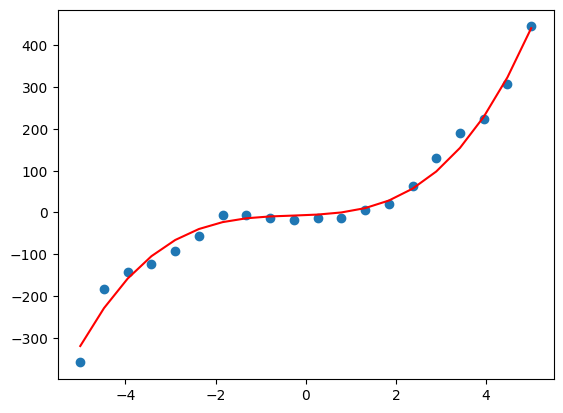

In [4]:
plt.scatter(x, y_true)
plt.plot(x, y_pred, color='red')
plt.show()

## Note - Graphs and tf.function

 https://www.tensorflow.org/guide/intro_to_graphs


* Eager execution: TensorFlow operations are executed by Python, operation by operation, and returning results back to Python.

* Graph execution: tensor computations are executed as a TensorFlow graph, sometimes referred to as a tf.Graph or simply a "graph."


> Graphs 

1. Data structures that contain a set of 

* tf.Operation objects, which represent units of computation
* tf.Tensor objects, which represent the units of data that flow between operations.


2. They are defined in a tf.Graph context. 

3. Since these graphs are data structures, they can be saved, run, and restored all without the original Python code.

<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/intro_to_graphs/two-layer-network.png?raw=1" width="400"/>

> The benefits of graphs

1. You can use your TensorFlow graph in environments that don't have a Python interpreter, like mobile applications, embedded devices, and backend servers.

2. TensorFlow uses graphs as the format for saved models when it exports them from Python.

3. Graphs are extremely useful and let your TensorFlow run fast, run in parallel, and run efficiently on multiple devices.


> Taking advantage of graphs

1. You create and run a graph in TensorFlow by using tf.function, either 

* as a direct call or 
* as a decorator.

2. tf.function takes a regular function as input and returns a Function.

3. A Function is a Python callable that builds TensorFlow graphs from the Python function.

4. A Function encapsulates several tf.Graphs behind one API 

> direct call

In [5]:
# Define a Python function.
def a_regular_function(x, y, b):
  x = tf.matmul(x, y)
  x = x + b
  return x

# `a_function_that_uses_a_graph` is a TensorFlow `Function`.
a_function_that_uses_a_graph = tf.function(a_regular_function)

# Make some tensors.
x1 = tf.constant([[1.0, 2.0]])
y1 = tf.constant([[2.0], [3.0]])
b1 = tf.constant(4.0)

orig_value = a_regular_function(x1, y1, b1).numpy()
# Call a `Function` like a Python function.
tf_function_value = a_function_that_uses_a_graph(x1, y1, b1).numpy()
assert(orig_value == tf_function_value)

> decorator

In [6]:
def inner_function(x, y, b):
  x = tf.matmul(x, y)
  x = x + b
  return x

# Use the decorator to make `outer_function` a `Function`.
@tf.function
def outer_function(x):
  y = tf.constant([[2.0], [3.0]])
  b = tf.constant(4.0)

  return inner_function(x, y, b)

# Note that the callable will create a graph that
# includes `inner_function` as well as `outer_function`.
outer_function(tf.constant([[1.0, 2.0]])).numpy()

array([[12.]], dtype=float32)

> Converting Python functions to graphs

1. Any function you write with TensorFlow will contain a mixture of built-in TF operations and Python logic, such as if-then clauses, loops, break, return, continue, and more. 

2. While TensorFlow operations are easily captured by a tf.Graph, Python-specific logic needs to undergo an extra step in order to become part of the graph. 

3. tf.function uses a library called AutoGraph (tf.autograph) to convert Python code into graph-generating code.

In [7]:
def simple_relu(x):
  if tf.greater(x, 0):
    return x
  else:
    return 0

# `tf_simple_relu` is a TensorFlow `Function` that wraps `simple_relu`.
tf_simple_relu = tf.function(simple_relu)

print("First branch, with graph:", tf_simple_relu(tf.constant(1)).numpy())
print("Second branch, with graph:", tf_simple_relu(tf.constant(-1)).numpy())

First branch, with graph: 1
Second branch, with graph: 0


> graph-generating

In [8]:
# This is the graph-generating output of AutoGraph.
print(tf.autograph.to_code(simple_relu))

def tf__simple_relu(x):
    with ag__.FunctionScope('simple_relu', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()

        def get_state():
            return (do_return, retval_)

        def set_state(vars_):
            nonlocal do_return, retval_
            (do_return, retval_) = vars_

        def if_body():
            nonlocal do_return, retval_
            try:
                do_return = True
                retval_ = ag__.ld(x)
            except:
                do_return = False
                raise

        def else_body():
            nonlocal do_return, retval_
            try:
                do_return = True
                retval_ = 0
            except:
                do_return = False
                raise
        ag__.if_stmt(ag__.converted_call(ag__.ld(tf).greater, (ag__.ld(x), 0), None, fscope), if_bo

> Graph execution vs. eager execution

The code in a Function can be executed both eagerly and as a graph. By default, Function executes its code as a graph:

In [9]:
@tf.function
def get_MSE(y_true, y_pred):
  print("Calculating MSE!")
  sq_diff = tf.pow(y_true - y_pred, 2)
  return tf.reduce_mean(sq_diff)

In [10]:
y_true = tf.random.uniform([5], maxval=10, dtype=tf.int32)
y_pred = tf.random.uniform([5], maxval=10, dtype=tf.int32)
print(y_true)
print(y_pred)

tf.Tensor([2 0 2 1 0], shape=(5,), dtype=int32)
tf.Tensor([5 8 6 6 4], shape=(5,), dtype=int32)


In [11]:
error = get_MSE(y_true, y_pred)
print(error)

Calculating MSE!
tf.Tensor(26, shape=(), dtype=int32)


1. To verify that your Function's graph is doing the same computation as its equivalent Python function, you can make it execute eagerly with tf.config.run_functions_eagerly(True). 

2. This is a switch that turns off Function's ability to create and run graphs, instead of executing the code normally.

In [12]:
tf.config.run_functions_eagerly(True)
# Observe what is printed below.
error = get_MSE(y_true, y_pred)
error = get_MSE(y_true, y_pred)
error = get_MSE(y_true, y_pred)

Calculating MSE!
Calculating MSE!
Calculating MSE!


In [13]:
# Don't forget to set it back when you are done.
tf.config.run_functions_eagerly(False)
# Observe what is printed below.
error = get_MSE(y_true, y_pred)
error = get_MSE(y_true, y_pred)
error = get_MSE(y_true, y_pred)

In [14]:
tf.config.run_functions_eagerly(True)